# King County House Sales Data Exploration, Analysis, & Modeling
### Kevin Velasco & Alex Shropshire

##### Imports

In [1]:
#PANDAS, NUMPY, MATPLOTLIB, SEABORN, MATH
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from math import sqrt

#STATSMODELS
import statsmodels.api as sm
from statsmodels.formula.api import ols

#SCI-KIT LEARN
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error

##### Data Loading

In [2]:
house_df = pd.read_csv('kc_house_data.csv')
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


##### Initial Correlation Analysis

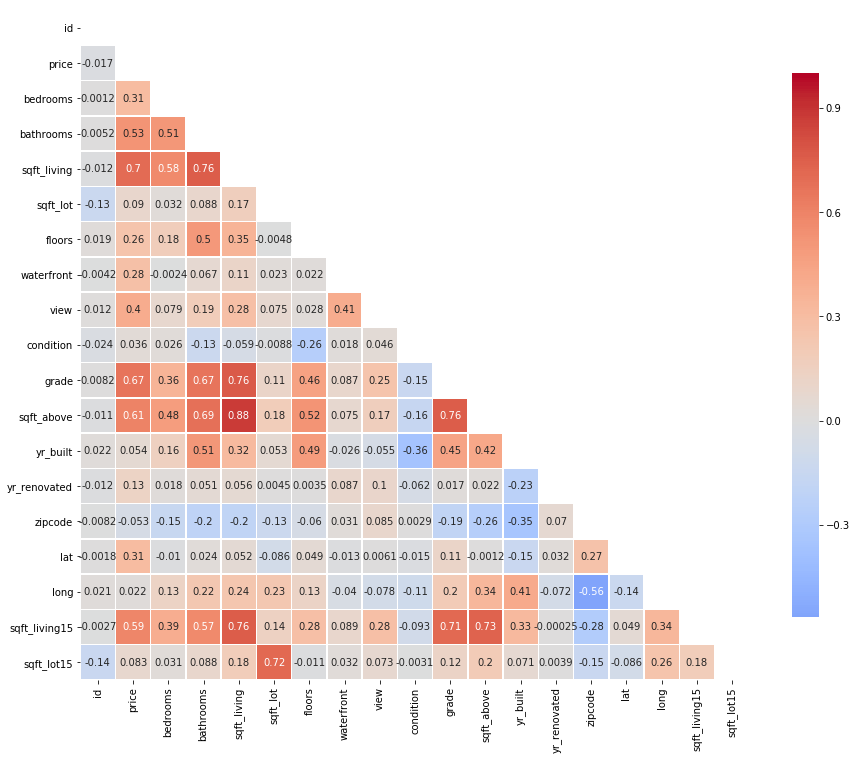

In [3]:
corr = house_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

- Correlation
- Notes
- Here


#### Data Cleaning Notes:
- set waterfront nulls to 0, assumption: nulls mean there is no waterfront view
- set view nulls to 0, assumption: nulls mean nobody has viewed
- set yr_renovated 0's to nulls, assumption: 0 = no renovation has been done
- set sqft_basement '0's & '?' to null, assumption: 0 & ? means no basement exists
- Change date to type datetime64 using pd.Timestamp
- Change zipcode to type str
- Change sqft_basement to type float

In [4]:
house_dff = house_df #to keep integrity of original dataframe, we'll manipulate a copy

In [5]:
#1) Set waterfront nulls to 0, assumption: nulls mean there is no waterfront view
house_dff['waterfront'] = house_dff['waterfront'].fillna(0)

#2) set view nulls to 0, assumption: nulls mean nobody has viewed
house_dff['view'] = house_dff['view'].fillna(0)

#3) set yr_renovated 0's to nulls, assumption: 0 = no renovation has been done
house_dff['yr_renovated'] = house_dff['yr_renovated'].replace(0,np.nan)

#4) set sqft_basement '0's & '?' to null, assumption: 0 & ? means no basement exists. values are in str format
house_dff['sqft_basement'] = house_dff['sqft_basement'].replace('0.0',np.nan)
house_dff['sqft_basement'] = house_dff['sqft_basement'].replace('?',np.nan)

#5) Change date to type datetime64 using pd.Timestamp
house_dff.date = house_dff.date.apply(pd.Timestamp)

#6) Change zipcode to type str
house_dff.zipcode = house_dff.zipcode.astype(str)

#7) Change sqft_basement to type float
house_dff['sqft_basement'] = house_dff['sqft_basement'].astype(float)

In [6]:
#View information of new dataframe house_dff after cleaning steps were completed
house_dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    8317 non-null float64
yr_built         21597 non-null int64
yr_renovated     744 non-null float64
zipcode          21597 non-null object
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(10), object(1)
memory u

##### Initial Visualizations: Histograms of x-variables & Simple Linear Regression Plots vs. Price (y)

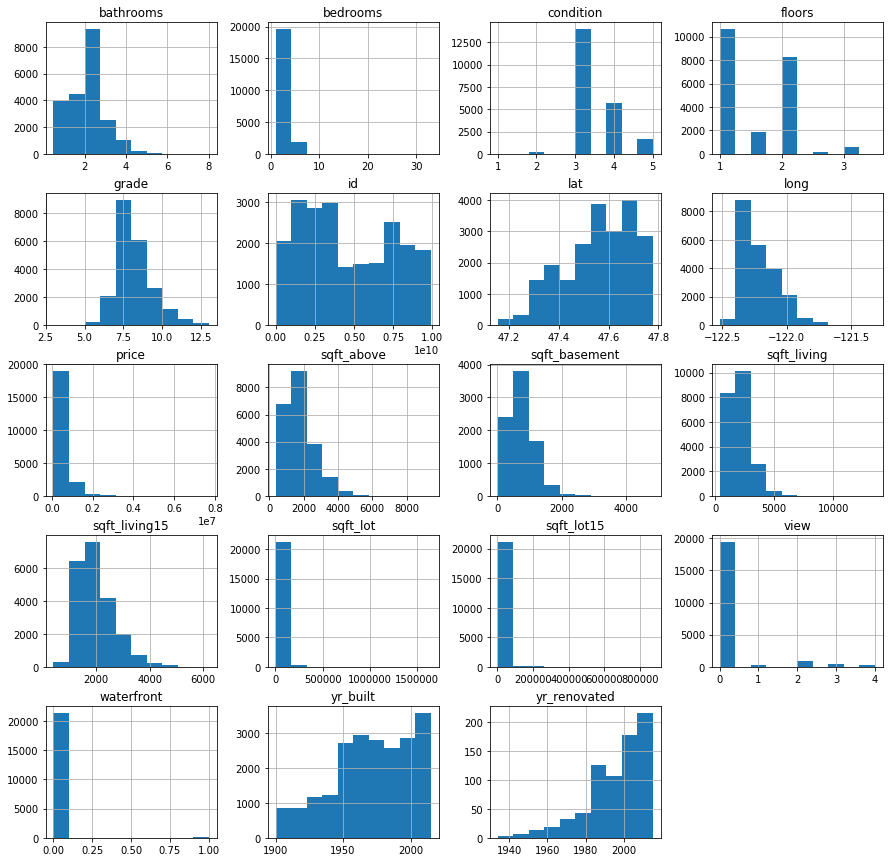

In [11]:
#Plot histograms of our x variables
house_dff.hist(figsize=[15,15]);

In [13]:
house_dff.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


TypeError: invalid type promotion

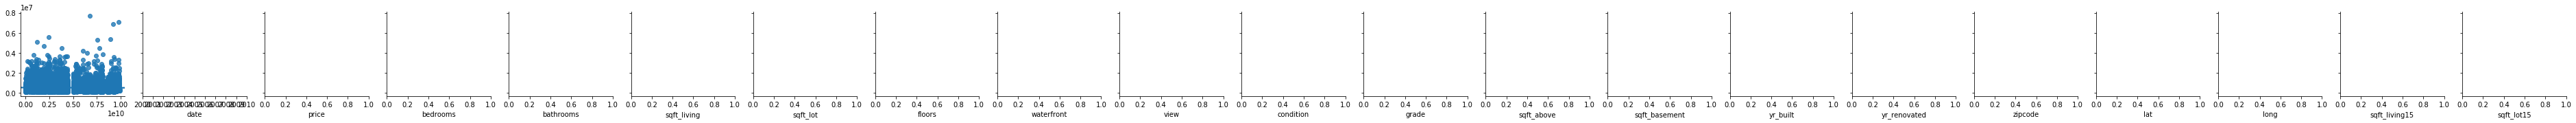

In [14]:
#Plot all our x variables vs. price(y) and the corresponding best-fit lines
sns.pairplot(house_dff,x_vars=house_dff.columns, y_vars="price",kind = 'reg');